In [1]:
# Applied Machine Learning (HOUSECS 59-03)
# Fall 2018, Duke University
# Splines and Linear and Polynomial Regression

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [3]:
# load dataset
boston = datasets.load_boston()
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


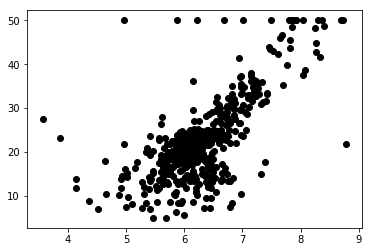

In [5]:
# plot RM vs. MEDV
plt.scatter(df["RM"], df["MEDV"], color="black")

---

In [6]:
# create and fit simple model
simple_regr = sklearn.linear_model.LinearRegression(normalize=True)
simple_regr.fit(df.loc[:300, ["RM"]], df.loc[:300, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [7]:
# predict model
simple_pred = simple_regr.predict(df.loc[300:, ["RM"]])
print("mean squared error", sklearn.metrics.mean_squared_error(simple_pred, df.loc[300:, "MEDV"]))
print("coefficients", simple_regr.coef_)

mean squared error 95.50796629878498
coefficients [11.2870153]


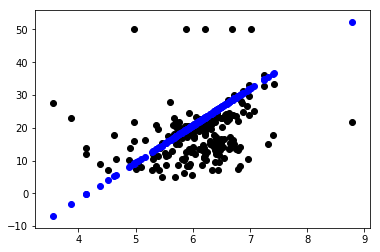

In [8]:
# plot predictions
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], simple_pred, color="blue") # predictions

---

In [9]:
# create and fit multivariate model
multivariate_regr = sklearn.linear_model.LinearRegression(normalize=True)
multivariate_regr.fit(df.loc[:300, boston.feature_names], df.loc[:300, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
# predict model
multivariate_pred = multivariate_regr.predict(df.loc[300:, boston.feature_names])
print("mean squared error", sklearn.metrics.mean_squared_error(multivariate_pred, df.loc[300:, "MEDV"]))
print("coefficients", multivariate_regr.coef_)

mean squared error 368.34092329235506
coefficients [ 1.21105379  0.01401646  0.02324334  0.61081683 -8.65745434  9.13529475
 -0.04852619 -1.02790139  0.1660454  -0.01488254 -0.63202848  0.01680055
 -0.10905698]


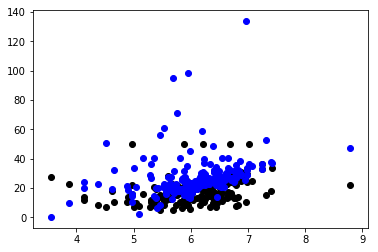

In [11]:
# plot predictions w.r.t. RM
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], multivariate_pred, color="blue") # predictions

---

In [12]:
poly_feat = [feat + "^2" for feat in boston.feature_names]
poly_df = pd.DataFrame(data=np.square(boston.data), columns=poly_feat)
poly_feat += list(boston.feature_names)
poly_df = pd.concat([poly_df, df], axis=1)
poly_df.head()

,CRIM^2,ZN^2,INDUS^2,CHAS^2,NOX^2,RM^2,AGE^2,DIS^2,RAD^2,TAX^2,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000040,324.0,5.3361,0.0,0.289444,43.230625,4251.04,16.728100,1.0,87616.0,...,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.000746,0.0,49.9849,0.0,0.219961,41.229241,6225.21,24.672082,4.0,58564.0,...,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.000745,0.0,49.9849,0.0,0.219961,51.624225,3733.21,24.672082,4.0,58564.0,...,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.001048,0.0,4.7524,0.0,0.209764,48.972004,2097.64,36.750269,9.0,49284.0,...,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.004768,0.0,4.7524,0.0,0.209764,51.079609,2937.64,36.750269,9.0,49284.0,...,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# create and fit polynomial model
poly_regr = sklearn.linear_model.LinearRegression(normalize=True)
poly_regr.fit(poly_df.loc[:300, poly_feat], poly_df.loc[:300, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
# predict model
poly_pred = poly_regr.predict(poly_df.loc[300:, poly_feat])
print("mean squared error", sklearn.metrics.mean_squared_error(poly_pred, poly_df.loc[300:, "MEDV"]))
print("coefficients", poly_regr.coef_)

mean squared error 102147.37662194399
coefficients [-4.15408851e-01  8.74112023e-04 -1.19935370e-03  6.35439273e-01
 -2.97260344e+01  2.03283057e+00 -4.67754766e-04  1.01082211e-01
 -1.24330668e-01  2.20265857e-04  3.18516024e-02 -2.34118863e-05
  1.65072742e-02  1.83830506e+00 -7.08995259e-02 -2.77392628e-02
  6.35439273e-01  2.59674039e+01 -2.00832069e+01  1.01479041e-02
 -1.54442478e+00  1.49061787e+00 -1.55363828e-01 -1.80707593e+00
  2.23379754e-02 -8.02212308e-01]


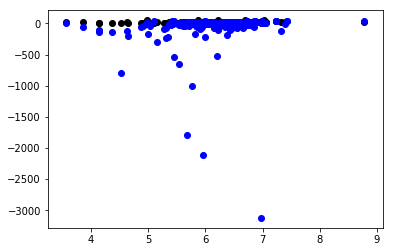

In [15]:
# plot predictions w.r.t. RM
plt.scatter(poly_df.loc[300:, ["RM"]], poly_df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(poly_df.loc[300:, ["RM"]], poly_pred, color="blue") # predictions

---

In [16]:
# create and fit regularized model
regularized_regr = sklearn.linear_model.Ridge(normalize=True, alpha=150)
regularized_regr.fit(poly_df.loc[:300, poly_feat], poly_df.loc[:300, "MEDV"])

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [17]:
# predict model
regularized_pred = regularized_regr.predict(poly_df.loc[300:, poly_feat])
print("mean squared error", sklearn.metrics.mean_squared_error(regularized_pred, poly_df.loc[300:, "MEDV"]))
print("coefficients", regularized_regr.coef_)

mean squared error 93.20412690877454
coefficients [-5.75143933e-03  8.04616702e-06 -1.08869812e-04  1.53300436e-02
 -1.04121243e-01  5.45810649e-03 -4.92315400e-06  1.20942949e-04
  2.90662077e-04 -3.77769595e-07 -3.20870661e-04  5.11681308e-07
 -1.71657723e-04 -1.70359857e-02  6.90866641e-04 -3.44084526e-03
  1.53300436e-02 -1.28002636e-01  7.31258360e-02 -5.46488253e-04
  1.74011221e-03  1.36090396e-03 -2.50218007e-04 -1.11153429e-02
  2.81970258e-04 -6.42917422e-03]


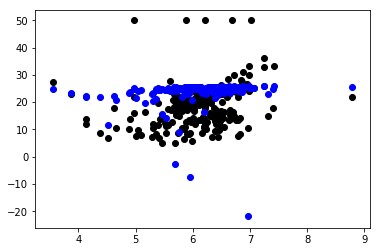

In [18]:
# plot predictions w.r.t. RM
plt.scatter(poly_df.loc[300:, ["RM"]], poly_df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(poly_df.loc[300:, ["RM"]], regularized_pred, color="blue") # predictions